In [1]:
import os
import h5py
import numba
import numpy as np
import pandas as pd
import scipy.integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from hoki.utils.exceptions import HokiFormatError
from pylab import cm
from scipy.optimize import fminbound
import matplotlib.ticker as ticker

In [2]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.linewidth'] = 2

In [3]:
data = h5py.File(f"/Users/dillon/Desktop/data.h5", "r")
observations = data['observations']

obs_Ia = observations['Ia']
obs_CCSN = observations['CCSN']
obs_LGRB = observations['LGRB']
obs_PISN = observations['PISN']

In [4]:
event_rates = data['event_rates']
h = event_rates.attrs['h']

In [6]:
TNG_100_100 = h5py.File("/Users/dillon/Desktop/100_100/TNG_100_100.h5", "r")
TNG_100_300 = h5py.File("/Users/dillon/Desktop/100_300/TNG_100_300.h5", "r")
TNG_135_100 = h5py.File("/Users/dillon/Desktop/135_100/TNG_135_100.h5", "r")
TNG_135_300 = h5py.File("/Users/dillon/Desktop/135_300/TNG_135_300.h5", "r")
TNG_135all_100 = h5py.File("/Users/dillon/Desktop/135all_100/TNG_135all_100.h5", "r")
TNG_170_100 = h5py.File("/Users/dillon/Desktop/170_100/TNG_170_100.h5", "r")
TNG_170_300 = h5py.File("/Users/dillon/Desktop/170_300/TNG_170_300.h5", "r")

In [12]:
empmodel_100_100 = h5py.File("/Users/dillon/Desktop/100_100/empmodel_100_100.h5", "r")
empmodel_100_300 = h5py.File("/Users/dillon/Desktop/100_300/empmodel_100_300.h5", "r")
empmodel_135_100 = h5py.File("/Users/dillon/Desktop/135_100/empmodel_135_100.h5", "r")
empmodel_135_300 = h5py.File("/Users/dillon/Desktop/135_300/empmodel_135_300.h5", "r")
empmodel_135all_100 = h5py.File("/Users/dillon/Desktop/135all_100/empmodel_135all_100.h5", "r")
empmodel_170_100 = h5py.File("/Users/dillon/Desktop/170_100/empmodel_170_100.h5", "r")
empmodel_170_300 = h5py.File("/Users/dillon/Desktop/170_300/empmodel_170_300.h5", "r")


In [13]:
def set_plot_params(ax):
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=12))
    ax.yaxis.set_tick_params(which='both', right=False)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='both', top=False)
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))


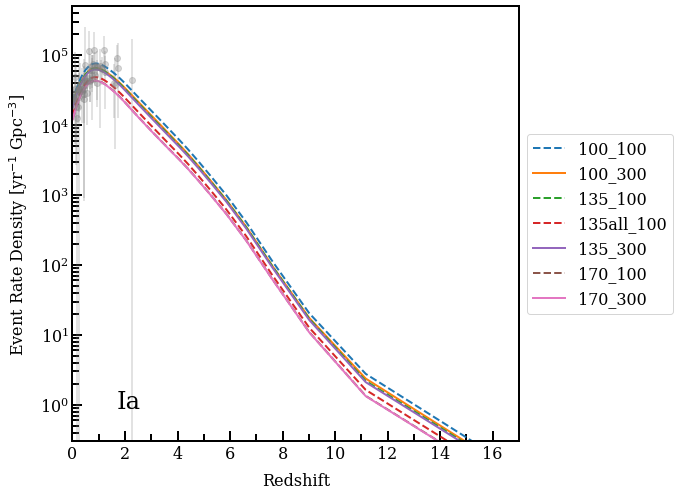

In [20]:
plt.figure(figsize=(8, 8))
plt.xlim(0, 17)
plt.ylim(3e-1, 5e5)
plt.yscale('log')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()
set_plot_params(ax)

plt.plot(empmodel_100_100['redshift_edges'][:-1], empmodel_100_100['Ia_rates'], '--', label='100_100', lw=2)
plt.plot(empmodel_100_300['redshift_edges'][:-1], empmodel_100_300['Ia_rates'], label='100_300', lw=2)
plt.plot(empmodel_135_100['redshift_edges'][:-1], empmodel_135_100['Ia_rates'], '--', label='135_100', lw=2)
plt.plot(empmodel_135all_100['redshift_edges'][:-1], empmodel_135all_100['Ia_rates'], '--', label='135all_100', lw=2)
plt.plot(empmodel_135_300['redshift_edges'][:-1], empmodel_135_300['Ia_rates'], label='135_300', lw=2)
plt.plot(empmodel_170_100['redshift_edges'][:-1], empmodel_170_100['Ia_rates'], '--', label='170_100', lw=2)
plt.plot(empmodel_170_300['redshift_edges'][:-1], empmodel_170_300['Ia_rates'], label='170_300', lw=2)

ax.errorbar(
    np.array(obs_Ia['mean_z']),
    np.array(obs_Ia['rate']) * h**3,
    xerr=[obs_Ia['lower_z'], obs_Ia['upper_z']],
    yerr=[obs_Ia['lower_rate'] * h**3, obs_Ia['upper_rate'] * h**3],
    fmt="o",
    ms=6,
    alpha=0.3,
    color='grey'
)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(0.1, 0.075, "Ia", transform=ax.transAxes, fontsize=24)

plt.show()


In [25]:
peak_100_100 = empmodel_100_100['redshift_edges'][:-1][np.argmax(empmodel_100_100['Ia_rates'])]
peak_100_300 = empmodel_100_300['redshift_edges'][:-1][np.argmax(empmodel_100_300['Ia_rates'])]
peak_135_100 = empmodel_135_100['redshift_edges'][:-1][np.argmax(empmodel_135_100['Ia_rates'])]
peak_135all_100 = empmodel_135all_100['redshift_edges'][:-1][np.argmax(empmodel_135all_100['Ia_rates'])]
peak_135_300 = empmodel_135_300['redshift_edges'][:-1][np.argmax(empmodel_135_300['Ia_rates'])]
peak_170_100 = empmodel_170_100['redshift_edges'][:-1][np.argmax(empmodel_170_100['Ia_rates'])]
peak_170_300 = empmodel_170_300['redshift_edges'][:-1][np.argmax(empmodel_170_300['Ia_rates'])]

print(f"Peak for 100_100: {peak_100_100}")
print(f"Peak for 100_300: {peak_100_300}")
print(f"Peak for 135_100: {peak_135_100}")
print(f"Peak for 135all_100: {peak_135all_100}")
print(f"Peak for 135_300: {peak_135_300}")
print(f"Peak for 170_100: {peak_170_100}")
print(f"Peak for 170_300: {peak_170_300}")


Peak for 100_100: 0.8876471430910174
Peak for 100_300: 0.8876471430910174
Peak for 135_100: 0.8876471430910174
Peak for 135all_100: 0.8876471430910174
Peak for 135_300: 0.8876471430910174
Peak for 170_100: 0.8580880969464915
Peak for 170_300: 0.8580880969464915


In [26]:
average_peak_redshift = np.mean([
    peak_100_100, peak_100_300, peak_135_100,
    peak_135all_100, peak_135_300, peak_170_100, peak_170_300
])

print(f"Average Peak Redshift: {average_peak_redshift}")

Average Peak Redshift: 0.8792017013354385


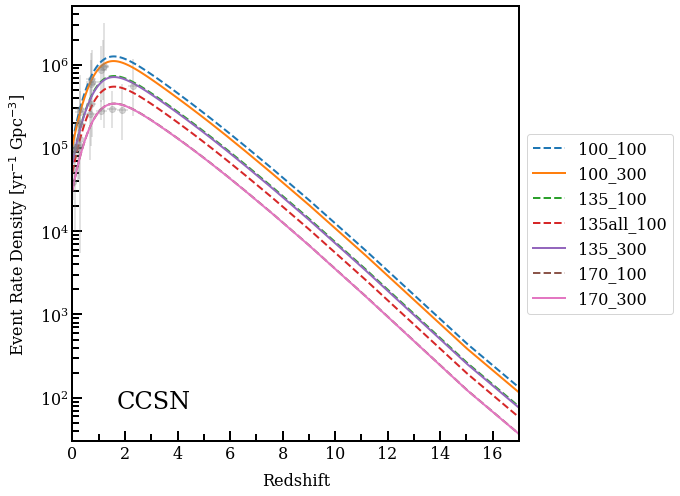

In [27]:
plt.figure(figsize=(8, 8))
plt.xlim(0, 17)
plt.ylim(3e1, 5e6)
plt.yscale('log')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()
set_plot_params(ax)


plt.plot(empmodel_100_100['redshift_edges'][:-1], empmodel_100_100['CCSN_rates'], '--', label='100_100', lw=2)
plt.plot(empmodel_100_300['redshift_edges'][:-1], empmodel_100_300['CCSN_rates'], label='100_300', lw=2)
plt.plot(empmodel_135_100['redshift_edges'][:-1], empmodel_135_100['CCSN_rates'], '--', label='135_100', lw=2)
plt.plot(empmodel_135all_100['redshift_edges'][:-1], empmodel_135all_100['CCSN_rates'], '--', label='135all_100', lw=2)
plt.plot(empmodel_135_300['redshift_edges'][:-1], empmodel_135_300['CCSN_rates'], label='135_300', lw=2)
plt.plot(empmodel_170_100['redshift_edges'][:-1], empmodel_170_100['CCSN_rates'], '--', label='170_100', lw=2)
plt.plot(empmodel_170_300['redshift_edges'][:-1], empmodel_170_300['CCSN_rates'], label='170_300', lw=2)




ax.errorbar(
            np.array(obs_CCSN['mean_z']),
            np.array(obs_CCSN['rate']) * h**3,
            xerr= [obs_CCSN['lower_z'], obs_CCSN['upper_z']],
            yerr=[obs_CCSN['lower_rate'] * h**3, obs_CCSN['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )


plt.legend( loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(0.1, 0.075, "CCSN", transform=ax.transAxes,fontsize=24)

plt.show()

In [23]:
peak_100_100 = empmodel_100_100['redshift_edges'][:-1][np.argmax(empmodel_100_100['CCSN_rates'])]
peak_100_300 = empmodel_100_300['redshift_edges'][:-1][np.argmax(empmodel_100_300['CCSN_rates'])]
peak_135_100 = empmodel_135_100['redshift_edges'][:-1][np.argmax(empmodel_135_100['CCSN_rates'])]
peak_135all_100 = empmodel_135all_100['redshift_edges'][:-1][np.argmax(empmodel_135all_100['CCSN_rates'])]
peak_135_300 = empmodel_135_300['redshift_edges'][:-1][np.argmax(empmodel_135_300['CCSN_rates'])]
peak_170_100 = empmodel_170_100['redshift_edges'][:-1][np.argmax(empmodel_170_100['CCSN_rates'])]
peak_170_300 = empmodel_170_300['redshift_edges'][:-1][np.argmax(empmodel_170_300['CCSN_rates'])]

print(f"Peak for 100_100: {peak_100_100}")
print(f"Peak for 100_300: {peak_100_300}")
print(f"Peak for 135_100: {peak_135_100}")
print(f"Peak for 135all_100: {peak_135all_100}")
print(f"Peak for 135_300: {peak_135_300}")
print(f"Peak for 170_100: {peak_170_100}")
print(f"Peak for 170_300: {peak_170_300}")


Peak for 100_100: 1.5586847070687158
Peak for 100_300: 1.5586847070687158
Peak for 135_100: 1.5586847070687158
Peak for 135all_100: 1.5586847070687158
Peak for 135_300: 1.5586847070687158
Peak for 170_100: 1.6196770408766143
Peak for 170_300: 1.6196770408766143


In [24]:
average_peak_redshift = np.mean([
    peak_100_100, peak_100_300, peak_135_100,
    peak_135all_100, peak_135_300, peak_170_100, peak_170_300
])

print(f"Average Peak Redshift: {average_peak_redshift}")

Average Peak Redshift: 1.5761110881566869


### Differences

##### Ia

In [37]:
redshifts = empmodel_100_100['redshift_edges'][:-1]

differences = []

for data1, label1 in [(np.array(empmodel_100_100['Ia_rates']), '100_100'),
                       (np.array(empmodel_100_300['Ia_rates']), '100_300'),
                       (np.array(empmodel_135_100['Ia_rates']), '135_100'),
                       (np.array(empmodel_135all_100['Ia_rates']), '135all_100'),
                       (np.array(empmodel_135_300['Ia_rates']), '135_300'),
                       (np.array(empmodel_170_100['Ia_rates']), '170_100'),
                       (np.array(empmodel_170_300['Ia_rates']), '170_300')]:
    for data2, label2 in [(np.array(empmodel_100_100['Ia_rates']), '100_100'),
                           (np.array(empmodel_100_300['Ia_rates']), '100_300'),
                           (np.array(empmodel_135_100['Ia_rates']), '135_100'),
                           (np.array(empmodel_135all_100['Ia_rates']), '135all_100'),
                           (np.array(empmodel_135_300['Ia_rates']), '135_300'),
                           (np.array(empmodel_170_100['Ia_rates']), '170_100'),
                           (np.array(empmodel_170_300['Ia_rates']), '170_300')]:
        if label1 != label2:
            diff = np.abs(data1 - data2)
            differences.append((label1, label2, redshifts[np.argmax(diff)], np.max(diff)))

max_diff_pair = max(differences, key=lambda x: x[3])

print(f"Maximum difference is {max_diff_pair[3]} between curves {max_diff_pair[0]} and {max_diff_pair[1]} at redshift {max_diff_pair[2]}")


Maximum difference is 33093.894421685065 between curves 100_100 and 170_300 at redshift 0.918225381367763


In [38]:
target_redshift = 0.918225381367763

redshifts_array = empmodel_100_100['redshift_edges'][:-1]
redshifts_target = np.array([target_redshift])

def interpolate_y(redshifts, values, target_redshift):
    return np.interp(target_redshift, redshifts, values)

y_values = []

for data, label in [(empmodel_100_100['Ia_rates'], '100_100'),
                    (empmodel_100_300['Ia_rates'], '100_300'),
                    (empmodel_135_100['Ia_rates'], '135_100'),
                    (empmodel_135all_100['Ia_rates'], '135all_100'),
                    (empmodel_135_300['Ia_rates'], '135_300'),
                    (empmodel_170_100['Ia_rates'], '170_100'),
                    (empmodel_170_300['Ia_rates'], '170_300')]:
    values_array = np.array(data)
    y_value = interpolate_y(redshifts_array, values_array, target_redshift)
    y_values.append((label, y_value))

for label, y_value in y_values:
    print(f"{label}: {y_value}")


100_100: 76213.18423101323
100_300: 65260.56201454361
135_100: 65066.331175942716
135all_100: 48498.56023485112
135_300: 62504.88026023482
170_100: 43451.484228049594
170_300: 43119.28980932817


In [39]:
76213.18423101323 / 43119.28980932817

1.7674962776062635

##### CCSN

In [34]:
redshifts = empmodel_100_100['redshift_edges'][:-1]

differences = []

for data1, label1 in [(np.array(empmodel_100_100['CCSN_rates']), '100_100'),
                       (np.array(empmodel_100_300['CCSN_rates']), '100_300'),
                       (np.array(empmodel_135_100['CCSN_rates']), '135_100'),
                       (np.array(empmodel_135all_100['CCSN_rates']), '135all_100'),
                       (np.array(empmodel_135_300['CCSN_rates']), '135_300'),
                       (np.array(empmodel_170_100['CCSN_rates']), '170_100'),
                       (np.array(empmodel_170_300['CCSN_rates']), '170_300')]:
    for data2, label2 in [(np.array(empmodel_100_100['CCSN_rates']), '100_100'),
                           (np.array(empmodel_100_300['CCSN_rates']), '100_300'),
                           (np.array(empmodel_135_100['CCSN_rates']), '135_100'),
                           (np.array(empmodel_135all_100['CCSN_rates']), '135all_100'),
                           (np.array(empmodel_135_300['CCSN_rates']), '135_300'),
                           (np.array(empmodel_170_100['CCSN_rates']), '170_100'),
                           (np.array(empmodel_170_300['CCSN_rates']), '170_300')]:
        if label1 != label2:
            diff = np.abs(data1 - data2)
            differences.append((label1, label2, redshifts[np.argmax(diff)], np.max(diff)))

max_diff_pair = max(differences, key=lambda x: x[3])

print(f"Maximum difference is {max_diff_pair[3]} between curves {max_diff_pair[0]} and {max_diff_pair[1]} at redshift {max_diff_pair[2]}")


Maximum difference is 915914.9297021639 between curves 100_100 and 170_300 at redshift 1.5586847070687158


In [35]:
target_redshift = 1.5586847070687158

redshifts_array = empmodel_100_100['redshift_edges'][:-1]
redshifts_target = np.array([target_redshift])

def interpolate_y(redshifts, values, target_redshift):
    return np.interp(target_redshift, redshifts, values)

y_values = []

for data, label in [(empmodel_100_100['CCSN_rates'], '100_100'),
                    (empmodel_100_300['CCSN_rates'], '100_300'),
                    (empmodel_135_100['CCSN_rates'], '135_100'),
                    (empmodel_135all_100['CCSN_rates'], '135all_100'),
                    (empmodel_135_300['CCSN_rates'], '135_300'),
                    (empmodel_170_100['CCSN_rates'], '170_100'),
                    (empmodel_170_300['CCSN_rates'], '170_300')]:
    values_array = np.array(data)
    y_value = interpolate_y(redshifts_array, values_array, target_redshift)
    y_values.append((label, y_value))

for label, y_value in y_values:
    print(f"{label}: {y_value}")


100_100: 1255302.2134286978
100_300: 1103980.6361603774
135_100: 729552.6830755101
135all_100: 543787.481056152
135_300: 709030.3463506578
170_100: 340356.13378751103
170_300: 339387.2837265338


In [36]:
1255302.2134286978 / 339387.2837265338

3.698730841194909